>
# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
 <li><a href="#gathering">Gathering   
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#wrangling">Wrangling Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
# Introduction:
> In this project, we gather, assess, and clean data then act on it wrangling the data.
 - WeRateDogs Twitter archive was downloaded from Ucadity ( given to us by dowloading it from the classroom)
 - Twitter Image Prediction (Image_predictions.tsv) was dowloaded programmatically from URL using the Requests library
 - Additional data from Twitter was downloaded using Twitter API (Tweepy) as stored as tweets_data.txt
<br> Data was then assessed visually and programmatically before being cleaned for exploratory analysis
<br> NB: API keys were removed from the work before submitting

<a id='gathering'></a>
# Gathering Data

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib as plt
import requests
import tweepy
import json
import numpy as np
import re
import ipynb.fs.full.funct as funct

### 1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
The WeRateDogs Twitter archive
> - Reading the data into a pandas DataFrame

In [259]:
data = pd.read_csv('twitter-archive-enhanced.csv')
df = pd.DataFrame(data)

In [260]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 2. Used the Requests library to download the tweet image prediction (image_predictions.tsv)
Twitter Image Prediction (Image_predictions.tsv)
> - Downloading data programmatically from URL using the Requests library

In [261]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [262]:
image_prediction = pd.read_csv('image_predictions.tsv')

 ### 3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
 Additional data from the Twitter API
> - Using Tweepy Library
> * Removed my Twitter API keys, secrets and tokens from the code after usuage

In [5]:
consumer_key = ''
consumer_secret = ''

access_token = ''

access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


#### Querying Twitter API for json data for each tweet id in the twitter archive
> -  Saving each tweet's returned JSON as a new line in a .txt file ( in a file tweet_json.txt specifically)

In [14]:
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'a+') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print (tweet_id, 'success')
    except:
        print (tweet_id, 'Failed')

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888202515573088257 Failed
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 success
885518971528720385 success
885311592912609280 success
88

#### Reading the tweet_json.txt line by line into a pandas dataFrame with:
> - tweet ID
> - retweet count
> - favourite count

In [263]:
mydf_list = []
with open('tweet_json.txt') as file:
    for line in file:
        mydf_list.append(json.loads(line))

In [264]:
tweets_data = pd.DataFrame(mydf_list, columns=['id', 'retweet_count', 'favourite_count'])

In [265]:
tweets_data.head(5)

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


<a id='assessing'></a>
# Assessing Data

##  Visual assessment

#### Displaying data in twitter-archive-enhanced.csv which was given to us to download manually

In [266]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Displaying data from Twitter Image Prediction (Image_predictions.tsv) which programmatically downloaded using the requests library

In [267]:
tweets_data.head()

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


In [268]:
image_prediction.head()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [269]:
# reading given tsv file
with open("image_predictions.tsv", 'r') as myfile:  
  with open("image_predictions.csv", 'w') as csv_file:
    for line in myfile:
        
      # Replace every tab with comma
      fileContent = re.sub("\t", ",", line)
        
      # Writing into csv file
      csv_file.write(fileContent)

In [270]:
image_predictions = pd.read_csv('image_predictions.csv')

In [271]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Programmatic Asssesment using pandas functions 

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [273]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [274]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [275]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [276]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [277]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [278]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2323 non-null   int64  
 1   retweet_count    2323 non-null   int64  
 2   favourite_count  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 54.6 KB


##### Checking for duplicate data in twitter-archive-enhanced table

In [279]:
df .duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [280]:
sum(df.duplicated())

0

> - No duplicate data

##### Checking for duplicate data in tweets_data table

In [281]:
tweets_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2318    False
2319    False
2320    False
2321    False
2322    False
Length: 2323, dtype: bool

In [282]:
sum(tweets_data.duplicated())

0

> - No duplicate data

##### Checking for duplicate data in image_predictions table

In [283]:
sum(image_predictions.duplicated())

0

> - No duplicate data

###### Trying to find clues on what to clean from image_predictions table

In [284]:
image_predictions.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
499,675822767435051008,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710,True,chow,0.202765,True,Pekinese,0.133266,True
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False


###### Trying to find clues on what to clean from tweets_data table

In [285]:
tweets_data.sample(8)

,id,retweet_count,favourite_count
1730,678446151570427904,1375,NaN
837,762699858130116608,3323,NaN
2314,666057090499244032,112,NaN
227,847116187444137987,2889,NaN
1864,674737130913071104,81,NaN
1616,683773439333797890,1224,NaN
1650,681891461017812993,749,NaN
538,803380650405482500,1774,NaN


###### Trying to find clues on what to clean from twitter_archive_enhannced  table

In [286]:
df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1429,697596423848730625,NaN,NaN,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
2215,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336...,10,10,None,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None


In [287]:
tweets_data.describe()

,id,retweet_count,favourite_count
count,2.323000e+03,2323.000000,0.0
mean,7.417642e+17,2477.195867,NaN
std,6.826313e+16,4195.600117,NaN
min,6.660209e+17,1.000000,NaN
25%,6.780222e+17,494.500000,NaN
50%,7.175377e+17,1149.000000,NaN
75%,7.986692e+17,2869.000000,NaN
max,8.924206e+17,70884.000000,NaN


In [288]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [289]:
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [290]:
tweets_data[tweets_data['favourite_count'].isnull()]

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN
...,...,...,...
2318,666049248165822465,37,NaN
2319,666044226329800704,115,NaN
2320,666033412701032449,36,NaN
2321,666029285002620928,39,NaN


In [291]:
image_predictions[image_predictions['p1'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issues

> ## Quality Issues : Visual Assessment

#### twitter-archive-enhanced table
1. Empty, NaN or missing values in `in_reply_to_status_id` column 

2. Empty, NaN or missing values in `in_reply_to_user_id` column

3. Empty, NaN or missing values in `retweeted_status_id` column

4. Empty, NaN or missing values in `retweeted_status_timestamp` column

5. Some missing values in `expanded_urls` column

6. Values in`rating_numerator` column  is greater than (>) `rating_denominator` column

7. `source` column contain url instead of a string or text



#### tweets_data table

8. Empty, NaN or missing values in `favourite_count` column <br>

#### image_predictions table

- Columns `p1`, `p2`, `p3` need descriptive names. This will make it easier to understand what they represent

- Columns `p1_conf`, `p2_conf` and `p3_conf` need descriptive names. This will make it easier to understand what they represent 

- Columns `p1_dog`, `p2_dog` and `p3_dog` need descriptive names. This will make it easier to understand what they represent

- Inconsistency in lettering of values in columns `p1`, `p2` and `p3`. Some values begin with lowercase while other values begin with uppercase
 

> ## Quality Issues: Programmatic Assessment

#### twitter-archive-enhanced table
9. Datatype of column `timestamp` is object instead of datetime
10. Datatype of column `retweeted_status_timestamp` is object instead of datetime
11. Datatype of `in_reply_to_status_id` is float instead of int
12. Datatype of `in_reply_to_user_id` is float instead of int 
13. Some missing values in expanded_urls column
14. New `day` column should be added to the table
15.  clean the url tag from `source` column

#### tweets_data table
14. Datatype of `favourite_count` column is float instead of int
15. Empty, NaN or missing values in `favourite_count` column

# Tidy Assessment Issues

### Tidiness : Visual Assessment

> ####  twitter-archive-enhanced table
1. new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)
2. dog stage is one variable and therefore should form single column instead of 4 columns(doggo, floofer, pupper, puppo)

#### tweets_data
3. Column `id` should be renamed as `tweet_id` for consistency in the other datasets especially when it comes to merging all the datasets
4. Information about one type of observational unit (tweets) is spread across three different files/dataframes

### Tidiness : Programatic Assessment

#### twitter-archive-enhanced table

In [292]:
df.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

 - The three tables should be merged as one 
- new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)
- unwanted columns in twitter archive enhanced should be dropped (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, 

<a id='cleaning'></a>
# Cleaning Data

##  Making copies of the original data

In [293]:
twitter_archive_enhanced_clean = df.copy()
tweet_data_clean = tweets_data.copy()
image_predictions_clean = image_predictions.copy()

##### Viewing the name counts in the twitter_archive_enhanced table

In [294]:
twitter_archive_enhanced_clean['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Cleaning tweet_data copy

### Issue #1: Empty, NaN or missing values in `favourite_count` column

#### Define
- **Missing Data** 

>`favourite_count` has NaN values : Changing dataype from float to int in attempts to recover the data


#### Code

In [295]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2323 non-null   int64  
 1   retweet_count    2323 non-null   int64  
 2   favourite_count  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 54.6 KB


In [296]:
tweet_data_clean.head()

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


##### Since `favourite_count` column has 0 non-null values (missing values), we will drop it

In [297]:
tweet_data_clean.drop(columns = 'favourite_count', inplace = True)

#### Test

In [298]:
tweet_data_clean.head()

,id,retweet_count
0,892420643555336193,7024
1,892177421306343426,5304
2,891815181378084864,3488
3,891689557279858688,7236
4,891327558926688256,7775


### Issue #2: Renaming column `id` as `tweet_id`

### Define :
> Renaming column `id` as `tweet_id`

### Code

In [299]:
tweet_data_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [300]:
tweet_data_clean.head()

,tweet_id,retweet_count
0,892420643555336193,7024
1,892177421306343426,5304
2,891815181378084864,3488
3,891689557279858688,7236
4,891327558926688256,7775


   ### Cleaning twitter_archive_enhanced_clean

### Issue #3

#### Define
> - New `day` column should be added to the table to assist in my visualizations.

#### Code

In [301]:
twitter_archive_enhanced_clean["timestamp"] = twitter_archive_enhanced_clean["timestamp"].astype('datetime64[ns]')

In [302]:
twitter_archive_enhanced_clean['day'] = twitter_archive_enhanced_clean['timestamp'].dt.date

#### I want to further define the `day` column whether it is a weekday or an weekend  into a new column `day_type` column in order to develop a question to explore later

In [303]:
twitter_archive_enhanced_clean['day_type'] = twitter_archive_enhanced_clean.apply(lambda x: funct.weekend_or_weekday(x), axis = 1)

#### Test

In [304]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday


In [305]:
twitter_archive_enhanced_clean['year'] = twitter_archive_enhanced_clean['timestamp'].dt.year

### Issue #4: Unwanted columns in twitter archive enhanced should be dropped

##### Define
> - Removing the `retweeted_status_id` in the copy of twitter_archive_enhanced

#### Code

In [306]:
twitter_archived_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

#### Test

In [307]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type,year
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday,2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday,2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday,2017
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday,2017
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday,2017


In [308]:
 twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_status_id'].isnull()]

##### Dropping unwanted columns in twitter archive enhanced

In [309]:
unwanted_columns_twitter_enhanced = ['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp']

In [310]:
twitter_archive_enhanced_clean.drop(columns = unwanted_columns_twitter_enhanced, inplace = True)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type,year
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday,2017
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday,2017
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday,2017
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday,2017
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday,2017


### Issue #5: Cleaning the `source` column 

###### Define
- Using Regex to clean the `source` column in the table. Removing the url attached to the sourc or device type

#### Code

In [311]:
trend =">(.*)</"
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean.apply(lambda x: str(re.findall(trend, x['source'])).strip("['']"), axis = 1)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type,year
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday,2017
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday,2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday,2017
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday,2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday,2017


#### Test

In [312]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type,year
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday,2017
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday,2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday,2017
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday,2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday,2017


### Issue #6: Missing values in column `name` in twitter_archive_enchanced_clean 

##### Define
-  Identifying all lower case words that are non-dog names in the name column and then using islower() function to handle these non-dog names

#### Code

In [313]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['name'].str.islower()]
twitter_archive_enhanced_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

#### Test

In [314]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,day_type,year
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,weekday,2017
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,weekday,2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,weekday,2017
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,weekday,2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,weekday,2017


### Issue #7 : Creating a ratings column

#### Define
> - New column ratings which would hold the final ratings ( rating_numerator / rating_denominator)

#### Code

- Creating a new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)

In [315]:
twitter_archive_enhanced_clean['ratings'] = twitter_archive_enhanced_clean.apply(lambda x: x['rating_numerator']/x['rating_denominator'], axis = 1)

> Since we now have a rating column, we can now drop the rating_numerator and rating denominator

In [316]:
twitter_archive_enhanced_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

#### Test

In [317]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,weekday,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,weekday,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,weekday,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,weekday,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,weekday,2017,1.2


### Issue #8

#### Define
- Inconsistency in lettering of values in name column. Some values begin with lowercase while other values begin with uppercase or symbols

#### Code

> Detecting names with inappropriate characters ( %,&, and many others) in the twitter archive data

In [318]:
twitter_archive_enhanced_clean['inappropriate_characters'] = twitter_archive_enhanced_clean.apply(lambda x: funct.check_invalid_characters(x['name']), axis = 1)
twitter_archive_enhanced_clean.head(40)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings,inappropriate_characters
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,weekday,2017,1.3,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,weekday,2017,1.3,False
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,weekday,2017,1.2,False
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,weekday,2017,1.3,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,weekday,2017,1.2,False
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,2017-07-29,weekday,2017,1.3,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,2017-07-28,weekday,2017,1.3,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,2017-07-28,weekday,2017,1.3,False
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,2017-07-27,weekday,2017,1.3,False
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,2017-07-26,weekday,2017,1.4,False


In [319]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['inappropriate_characters']== 'True']

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings,inappropriate_characters


> ##### From the result, there is not any name that has inappropriate characters. Hence, names might rather have accents on them which is appropriate.
- **Hence we need to drop the `inappropriate_characters` column in the table because we won't need it**

In [320]:
twitter_archive_enhanced_clean.drop(columns = 'inappropriate_characters', inplace = True)

#### Test

In [321]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,weekday,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,weekday,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,weekday,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,weekday,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,weekday,2017,1.2


### Cleaning Image prediction_clean 

### Issue #9

#### Define

- Cleaning Image prediction data copy

#### Code

In [322]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### checking to see if `img_num`  column has diferent values

In [323]:
image_predictions_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

> ##### Since it does, I don't think image_predictions_clean needs to be cleaned

#### Test 

In [324]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,weekday,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,weekday,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,weekday,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,weekday,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,weekday,2017,1.2


### Issue #10 :  Four dog stage columns should be combined into a single column

#### Define
> - Creating a single column for dog stages

#### Code

In [325]:
 #creating replacements for all four stages
    
twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True) 
twitter_archive_enhanced_clean.puppo.replace('None', '', inplace=True) 
twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True) 

In [326]:
# Then combining stage columns.
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo


In [327]:
# Then format entries with multiple dog stages which appeared like doggopupper.

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [328]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,,,,2017-08-01,weekday,2017,1.3,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,,,,2017-08-01,weekday,2017,1.3,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,,,,2017-07-31,weekday,2017,1.2,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,,,,2017-07-30,weekday,2017,1.3,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,,,,2017-07-29,weekday,2017,1.2,


## Final Results of Data Cleaning

##### Viewing samples of each data to have a general check of a successful data cleaning

In [329]:
image_predictions_clean.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
523,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,Boston_bull,0.976577,True,French_bulldog,0.014324,True,Chihuahua,0.002302,True
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False


In [330]:
tweet_data_clean.sample(5)

,tweet_id,retweet_count
1382,698710712454139905,621
2180,668567822092664832,46
771,773547596996571136,5706
760,775729183532220416,4283
147,862457590147678208,4267


In [331]:
twitter_archive_enhanced_clean.sample(30)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,day_type,year,ratings,stage
1658,683111407806746624,2016-01-02 02:23:45,Twitter for iPhone,This is Larry. He thought the New Year's parti...,https://twitter.com/dog_rates/status/683111407...,Larry,,,pupper,,2016-01-02,weekday,2016,1.0,pupper
583,800188575492947969,2016-11-20 04:06:37,Twitter for iPhone,RT @dog_rates: This is Bo. He's a Benedoop Cum...,https://twitter.com/dog_rates/status/681694085...,Bo,,,pupper,,2016-11-20,weekday,2016,1.1,pupper
1187,718460005985447936,2016-04-08 15:26:28,Twitter for iPhone,Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,Bowie,,,,,2016-04-08,weekday,2016,0.9,
535,807059379405148160,2016-12-09 03:08:45,Twitter for iPhone,RT @dog_rates: This is Cali. She arrived preas...,https://twitter.com/dog_rates/status/782969140...,Cali,,,,,2016-12-09,weekday,2016,1.2,
702,786036967502913536,2016-10-12 02:53:11,Twitter for iPhone,RT @dog_rates: This is Scout. He really wants ...,https://twitter.com/dog_rates/status/779834332...,Scout,,,,,2016-10-12,weekday,2016,1.1,
300,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,Meera,doggo,,,,2017-03-01,weekday,2017,1.2,doggo
1315,706681918348251136,2016-03-07 03:24:33,Twitter for iPhone,Say hello to Katie. She's a Mitsubishi Hufflep...,https://twitter.com/dog_rates/status/706681918...,Katie,,,,,2016-03-07,weekday,2016,1.2,
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,None,doggo,,pupper,,2016-07-09,weekday,2016,0.5,"doggo,pupper"
1626,684800227459624960,2016-01-06 18:14:31,Twitter for iPhone,Meet Theodore. He's dapper as hell. Probably o...,https://twitter.com/dog_rates/status/684800227...,Theodore,,,,,2016-01-06,weekday,2016,1.1,
344,832032802820481025,2017-02-16 01:04:13,Twitter for iPhone,This is Miguel. He was the only remaining dogg...,"https://www.petfinder.com/petdetail/34918210,h...",Miguel,doggo,,,,2017-02-16,weekday,2017,1.2,doggo


<a id='storing'></a>
# Storing Data

### Merging All 3 cleaned data copies

In [332]:
twitter_archive_master = pd.merge(pd.merge(image_predictions_clean, twitter_archive_enhanced_clean, on = 'tweet_id'), tweet_data_clean, on = 'tweet_id')
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,doggo,floofer,pupper,puppo,day,day_type,year,ratings,stage,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,,,,,2015-11-15,weekday,2015,0.8,,424
1,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,,,,,2015-11-16,weekday,2015,0.5,,37
2,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,...,,,,,2015-11-16,weekday,2015,0.9,,51
3,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,...,,,,,2015-11-16,weekday,2015,1.0,,132
4,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,...,,,,,2015-11-16,weekday,2015,0.6,,37


In [333]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='wrangling'></a>
# Wrangling Data

In [334]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis
    y (str): y-axis
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

### Question 1: How many tweets posted yearly?

In [335]:
tweet_per_year = twitter_archive_master['year'].value_counts()
tweet_per_year

2016    963
2015    599
2017    368
Name: year, dtype: int64

<AxesSubplot:title={'center':'Tweets on yearly basis'}, xlabel='Year', ylabel='Frequency of tweets'>

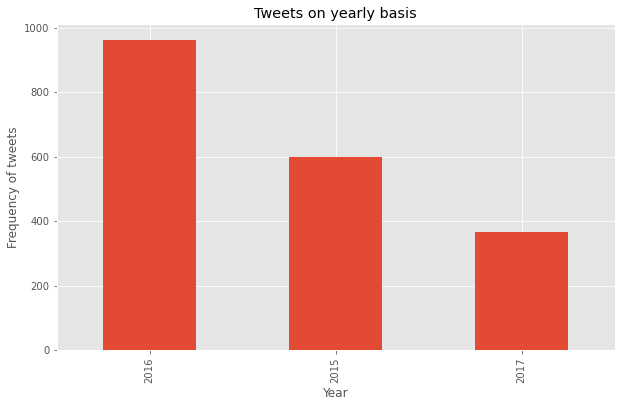

In [336]:
tweet_per_year.plot(kind='bar', figsize=(10,6), xlabel="Year", ylabel="Frequency of tweets", title="Tweets on yearly basis")

> **From the bar chart, it is discovered that the year 2016 recorded the most number of tweets, followed by the years 2015 and 2017 respectively**

### Question 2: What kind of devices were the tweets posted from?

In [337]:
devices = twitter_archive_master.source.value_counts()
devices

Twitter for iPhone    1894
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64

<AxesSubplot:title={'center':'Devices most used for tweets'}, xlabel='Device/ Source used', ylabel='Frequency'>

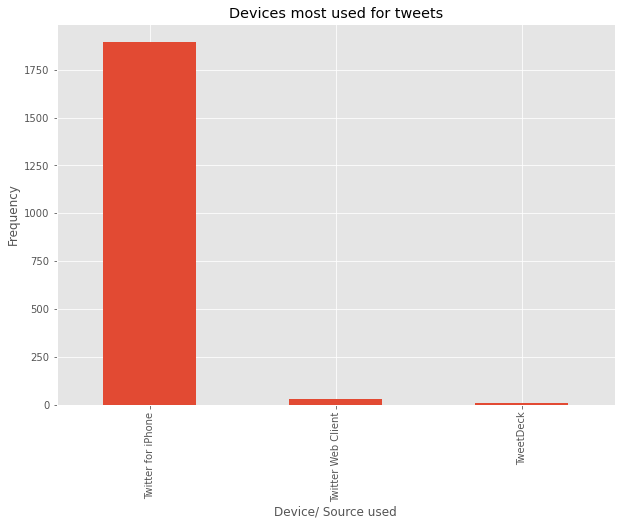

In [343]:
devices.plot(kind='bar', figsize=(10,7), xlabel='Device/ Source used', ylabel='Frequency', title='Devices most used for tweets')

> **From the bar chart, it can be deduced that tweets from Twitter for Iphones were the highest, followed by Twitter  web clients and TweetDeck respectively**

### Question 3 :  Which Dogs had the highest tweet ratings ( Top 10)?

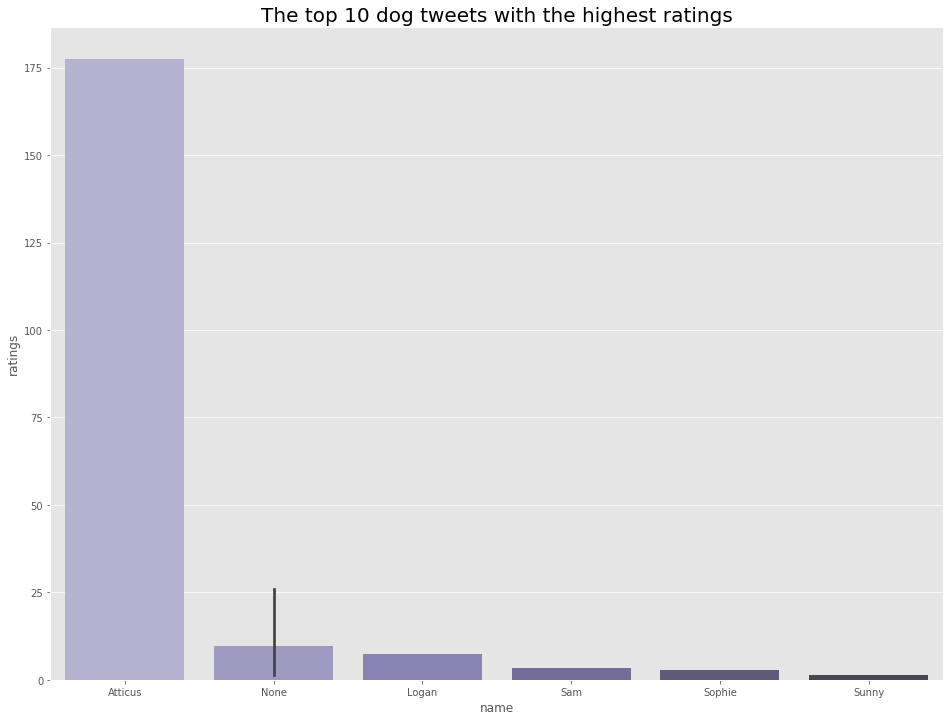

In [342]:
funct.top_plot(twitter_archive_master, 'name', 'ratings', 'The top 10 dog tweets with the highest ratings', 10) 

> **From the bar chart, the top 10 dog tweets were Atticus, Logan, Sam, Sophie, to mention but a few respectively. However, from 5th place to 6th place are names of dogs which was probably a typing mistake or rare names people call their dogs.**

### Question 4:  What is the nature of tweets on a daily basis from 2015 to date?

In [346]:
tweets_per_day = twitter_archive_master.day.value_counts()
tweets_per_day

2015-11-29    26
2015-11-28    25
2015-11-19    21
2015-11-20    20
2015-12-01    19
              ..
2016-06-15     1
2017-03-18     1
2017-03-19     1
2017-03-20     1
2015-11-15     1
Name: day, Length: 591, dtype: int64

<AxesSubplot:title={'center':'Tweets on yearly basis'}, xlabel='Day', ylabel='Frequency of tweets'>

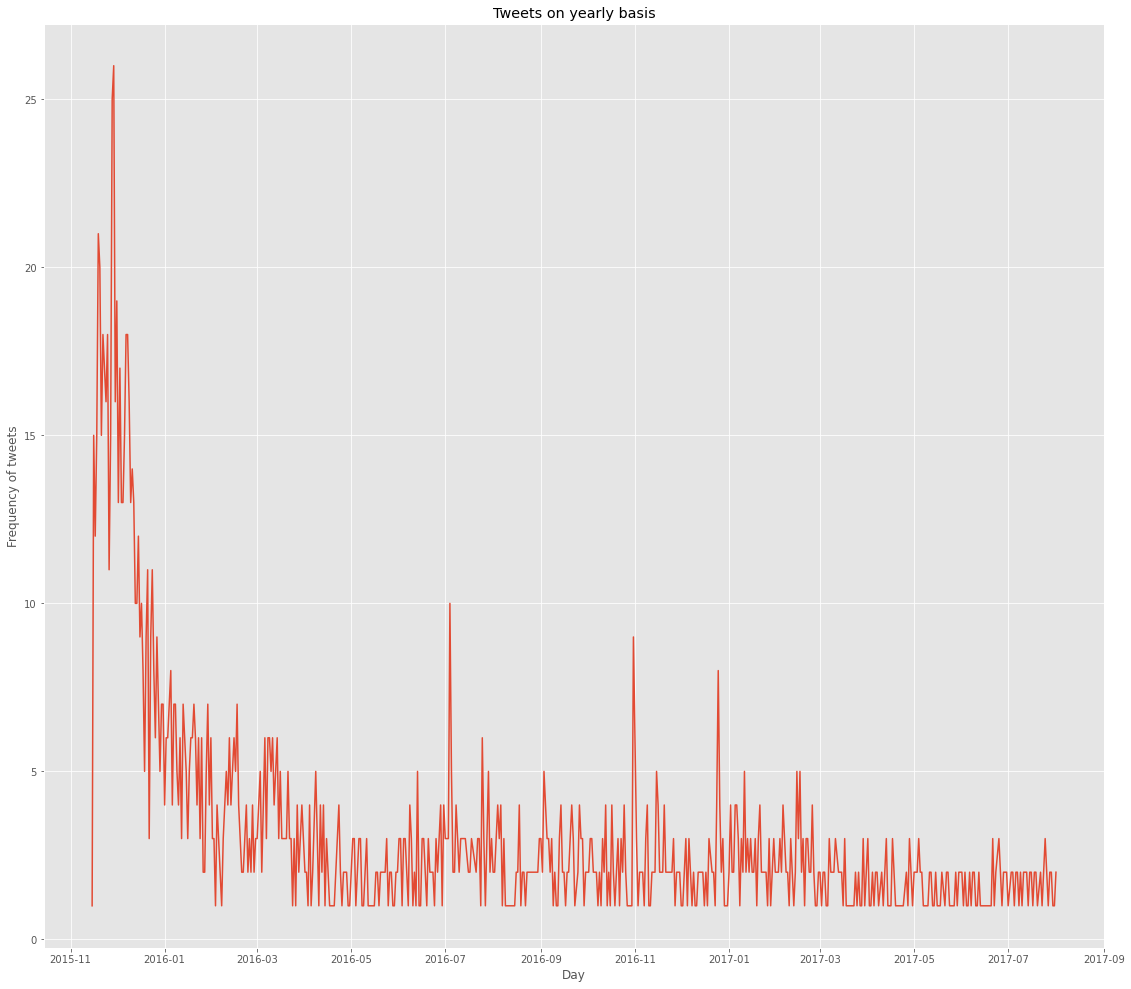

In [347]:
tweets_per_day.plot(kind='line', figsize=(19,17), xlabel="Day", ylabel="Frequency of tweets", title="Tweets on yearly basis")

> **From this line chart, it can be deductedb that there is a sharp drop in number of tweets from 2015-11 to 2026-01 and a gradual rise and drop in the tweets from 2016-03 to 2017-09**

<a id='conclusions'></a>
# Conclusions:

- #### Question 1: How many tweets sent on yearly?
From the data exploratory analysis perform, we found that years 2016, 2015 and 2017 recorded 963 tweets,599 tweets and 368 tweets respectively.
From the bar chart visiualized based on these figures, it is discovered that the year 2016 recorded the most number of tweets, followed by the years 2015 and 2017 respectively.

- #### Question 2: What kind of devices were the tweets posted from?
Figuratively, sources of tweets from Twitter for iPhone was 1894, followed by Twitter Web Client which also was 27 and tweets from TweetDeck recorded was 9.
From the bar chart visiualized based on this figures, it can be deduced that tweets from Twitter for Iphones were the highest, followed by Twitter web clients and TweetDeck respectively.

- #### Question 3: Which Dogs had the highest tweet ratings ( Top 10)?
From the bar chart, the top 10 dog tweets were Atticus, None (dogs without name), Logan, Sam, Sophie, to mention but a few respectively. However, from 5th place to 6th place are names of dogs which was probably a typing mistake or rare names people call their dogs.
- #### Question 4: What is the nature of tweets on a daily basis from 2015 till date?
From this line chart visualized based on this question, it can be deduced that there is a sharp drop in number of tweets from 2015-11 to 2016-01 and a gradual rise and drop in the tweets from 2016-03 to 2017-01

<a id='limitation'></a>
# Limitations:
> I struggled with fully grasping what some of the columns in the datasets represented; for example, `p1_conf` column, `p2_conf` column, to mention but a few. Again, there was 0 non-null values in `favourite_count` column in tweets data downloaded using tweepy (twitter API) which was a vital part of the data but was not present because it had NaN values. Another limitation was that the datasets were very huge (numerous records) hence assessing and cleaning was very difficult to carry out.

<a id='references'></a>
# References

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://www.youtube.com/watch?v=bNDRiaFyLrs&t=28s
- https://www.youtube.com/watch?v=Lu1nskBkPJU
- https://medium.com/analytics-vidhya/fetch-tweets-using-their-ids-with-tweepy-twitter-api-and-python-ee7a22dcb845
- https://stackoverflow.com/questions/54407027/use-api-to-write-to-json-file
- https://www.geeksforgeeks.org/python-convert-tsv-to-csv-file/
- https://sparkbyexamples.com/pandas/pandas-change-string-object-to-date-in-dataframe/
- https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file